In [5]:
import os
import pandas as pd

In [6]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [7]:
df_Site = pd.read_csv(cwd + "//Site.csv")

In [9]:
for i in range(df_Site.shape[0]):
    if not os.path.exists(cwd_Images_Raw + "\\" + df_Site.loc[i,"Site"]):
        os.makedirs(cwd_Images_Raw + "\\" + df_Site.loc[i,"Site"])
        os.makedirs(cwd_Images_Raw + "\\" + df_Site.loc[i,"Site"] + "\\L2A")
        os.makedirs(cwd_Images_Raw + "\\" + df_Site.loc[i,"Site"] + "\\L1C")
    if not os.path.exists(cwd_Images_Processed + "\\" + df_Site.loc[i,"Site"]): 
        os.makedirs(cwd_Images_Processed + "\\" + df_Site.loc[i,"Site"])

In [ ]:
img_1200 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 1200m.tif")
band_1200 = img_1200.read(1)
band_1200.shape

(31, 31)

In [ ]:
img_1800 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 1800m.tif")
band_1800 = img_1800.read(1)
band_1800.shape

(45, 45)

In [ ]:
# reshape the band arrays into one-dimensional array
band_1200_reshape = band_1200.reshape(-1)
band_1800_reshape = band_1800.reshape(-1)

In [ ]:
# Get the coordinates n-dimensional array
list_Coordinates_1200 = []
for x in range(img_1200.shape[0]):
    for y in range(img_1200.shape[1]):
        temp_x, temp_y = img_1200.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1200.append(temp_list)
arr_Coordinates_1200 = np.array(list_Coordinates_1200)
arr_Coordinates_1200.shape

(961, 2)

In [ ]:
# Get the coordinates n-dimensional array
list_Coordinates_1800 = []
for x in range(img_1800.shape[0]):
    for y in range(img_1800.shape[1]):
        temp_x, temp_y = img_1800.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1800.append(temp_list)
arr_Coordinates_1800 = np.array(list_Coordinates_1800)
arr_Coordinates_1800.shape

(2025, 2)

In [ ]:
# Get the maximum lag
diagonal_1200 = 1200 * (2 ** 0.5) / 2
bin_1200 = np.arange(10,diagonal_1200,10)
bin_1200[-1]

210.0

In [ ]:
# Get the maximum lag
diagonal_1800 = 1800 * (2 ** 0.5) / 2
bin_1800 = np.arange(10,diagonal_1800,10)
bin_1800[-1]

310.0

## Variogram

In [ ]:
V_1200 = skg.Variogram(arr_Coordinates_1200, band_1200_reshape, use_nugget=True, bin_func=bin_1200, maxlag = bin_1200[-1])
V_1200.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 10445.327541215082,
 'normalized_sill': 1191.1945437201907,
 'normalized_nugget': 1.4226858522342035e-11,
 'effective_range': 49.73965495816705,
 'sill': 33.39265787044128,
 'nugget': 3.988203452679121e-13,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 210.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

In [ ]:
V_1800 = skg.Variogram(arr_Coordinates_1800, band_1800_reshape, use_nugget=True, bin_func=bin_1800, maxlag = bin_1800[-1])
V_1800.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 96099.99999999999,
 'normalized_sill': 10654.0735001927,
 'normalized_nugget': 5526.4980960215735,
 'effective_range': 309.99999999999994,
 'sill': 81.12903108122197,
 'nugget': 42.08338114002487,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 310.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

### Variogram Plot

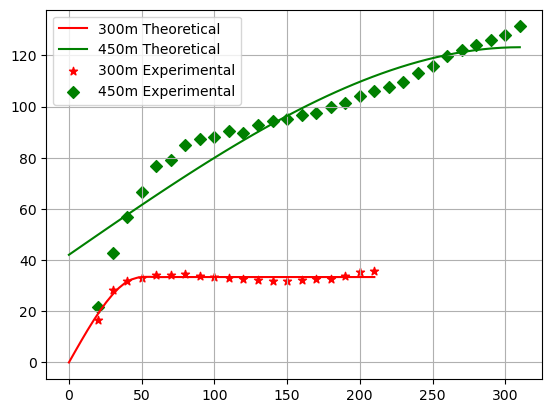

In [ ]:
# Get the theoretical functions
def f_1200(x):
   return V_1200.fitted_model(x)
def f_1800(x):
   return V_1800.fitted_model(x)
# Create cubic interpolation model in order to make curved plot (otherwise it will be ugly af)
cubic_model_1200 = interp1d(np.concatenate((np.array([0]),bin_1200)), f_1200(np.concatenate((np.array([0]),bin_1200)),), kind = "cubic")
cubic_model_1800 = interp1d(np.concatenate((np.array([0]),bin_1800)), f_1800(np.concatenate((np.array([0]),bin_1800)),), kind = "cubic")
x_1200 = np.linspace(0,bin_1200[-1])
x_1800 = np.linspace(0,bin_1800[-1])
# Plot! 
plt.plot(x_1200, cubic_model_1200(x_1200),label = '1200m Theoretical', color = 'Red')
plt.plot(x_1800, cubic_model_1800(x_1800), label = '1800m Theoretical', color = 'Green')
plt.scatter(V_1200.get_empirical()[0],V_1200.get_empirical()[1], color = 'Red', label = '1200m Experimental', marker = '*')
plt.scatter(V_1800.get_empirical()[0],V_1800.get_empirical()[1], color = 'Green', label = '1800m Experimental', marker = 'D')
plt.legend()
plt.grid()

### Variogram Parameters

In [ ]:
range_1200 = V_1200.parameters[0]
sill_1200 = V_1200.parameters[1] + V_1200.parameters[2]
nugget_1200 = V_1200.parameters[2]
range_1800 = V_1800.parameters[0]
sill_1800 = V_1800.parameters[1] + V_1800.parameters[2]
nugget_1800 = V_1800.parameters[2]
print("1200m Range: " + str(range_1200) + "; Sill: " + str(sill_1200) + "; Nugget: " + str(nugget_1200))
print("1800m Range: " + str(range_1800) + "; Sill: " + str(sill_1800) + "; Nugget: " + str(nugget_1800))

300m Range: 49.73965495816705; Sill: 33.39265787044168; Nugget: 3.988203452679121e-13
450m Range: 309.99999999999994; Sill: 123.21241222124684; Nugget: 42.08338114002487


## Roman Metrics

### Rcv (Coefficient of Variation)

In [ ]:
CV_1200 = np.std(band_1200) / np.mean(band_1200)
CV_1800 = np.std(band_1800) / np.mean(band_1800)
Rcv_1200 = (CV_1800 - CV_1200) / CV_1200
Rcv_1200

1.126701378500121

### RAW Score

In [ ]:
RAW_1200 = (abs(2 * Rcv_1200)) ** (-1)
RAW_1200

0.4437733098947711

### Rse (Scale Requirement)

In [ ]:
Rse_1200 = math.exp(-((g / range_1200) ** 2 + (g / range_1800) ** 2) ** (1/2))
Rse_1200

0.9094764938565276

### Rst (Spatial Correlation)

In [ ]:
# Get the index of the range in the bin
for i in range(len(V_1200.bins)):
    if range_1200 >= V_1200.bins[i] and range_1200 <= V_1200.bins[i+1]:
        index_1200 = i + 1
estimator_Range_1200 = V_1200.experimental[index_1200]
print(f"The range {(range_1200)} falls in {V_1200.bins[index_1200 - 1]} and {V_1200.bins[index_1200]}, whose value is {estimator_Range_1200}")
for i in range(len(V_1800.bins)):
    if range_1800 >= V_1800.bins[i] and range_1800 <= V_1800.bins[i+1]:
        index_1800 = i + 1
estimator_Range_1800 = V_1800.experimental[index_1800]
print(f"The range {(range_1800)} falls in {V_1800.bins[index_1800 - 1]} and {V_1800.bins[index_1800]}, whose value is {estimator_Range_1800}")

The range 49.73965495816705 falls in 40.0 and 50.0, whose value is 33.13799407122397
The range 309.99999999999994 falls in 300.0 and 310.0, whose value is 131.32257785164995


In [ ]:
ST_1200 = (estimator_Range_1200 - nugget_1200) / estimator_Range_1200
ST_1800 = (estimator_Range_1800 - nugget_1800) / estimator_Range_1800
Rst_1200 = (ST_1800 - ST_1200) / ST_1200
Rst_1200

-0.32045807985557345

### Rsv Structural Variability

In [ ]:
def f_1200_SV(x):
    return (V_1200.fitted_model(x) - nugget_1200) / sill_1200
def f_1800_SV(x):
    return (V_1800.fitted_model(x) - nugget_1800) / sill_1800
SV_1200 = quad(f_1200_SV, 0, range_1200)[0]
SV_1800 = quad(f_1800_SV, 0, range_1800)[0]
Rsv_1200 = (SV_1800 - SV_1200) / SV_1200
Rsv_1200

3.103748666987712

### ST Score

In [ ]:
ST_Score_1200 = (abs(Rcv_1200) / 3 + abs(Rst_1200) / 3 + abs(Rsv_1200) / 3 +Rse_1200) ** (-1)
ST_Score_1200

0.41212541058007546